In [70]:
# Library import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import requests
import collections
import os
os.environ["PATH"] += os.pathsep + '/Users/Choichanghyun/MachineLearning'

In [67]:
# Data load 
'''
IRIS Data

총 150개 instance  (Class 당 50 개)
Feature 
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
Class

    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica
'''

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = requests.get(url = url)
data_line = data.text.split("\n")
data_comma = [ line.split(",") for line in data_line[:-2] ]

In [248]:
# Data 를  X_train/ X_test  , y_train/ y_test 로 나눔 
# Trian data 100 개  / Test data 50개 약 ( 66%  /  33% ) 


def trans( text):
    if text == 'Iris-setosa':
        return 0 
    elif text == 'Iris-versicolor':
        return 1
    else :
        return 2
    
X = []
Y = []
for xData in data_comma:
        tempX = []
        for temp in xData[:4]:
            
            tempX.append( float(temp) )
        X.append(tempX)

for yData in data_comma:
        tempY = []
        for temp in yData[4:]:
            tempY.append( trans(temp) )
        Y.append(tempY)
        
        
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=43)

print("X_train 개수: ",len(X_train))
print("X_text  개수: ",len(X_test))

X_train 개수:  100
X_text  개수:  50


In [251]:
# DecisionTree 생성 및 학습
decisionTree = tree.DecisionTreeClassifier( max_depth=5, random_state=45 )
decisionTree.fit( X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=45,
            splitter='best')

In [252]:
print("Train data : " )
print(classification_report(np.asarray(y_train),decisionTree.predict(X_train)))
print("\nTest data : " )
print(classification_report(np.asarray(y_test),decisionTree.predict(X_test)))

Train data : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      1.00      1.00        28
          2       1.00      1.00      1.00        37

avg / total       1.00      1.00      1.00       100


Test data : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.91      0.95      0.93        22
          2       0.92      0.85      0.88        13

avg / total       0.94      0.94      0.94        50



###### 

In [253]:
feauture = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm"]
class_name = ['Iris-setosa','Iris-versicolor','Iris-virginica' ]
dot_data = tree.export_graphviz(decisionTree,
                                feature_names=feauture,
                                class_names = class_name,
                                out_file= None,
                                filled=True,
                                rounded=True)


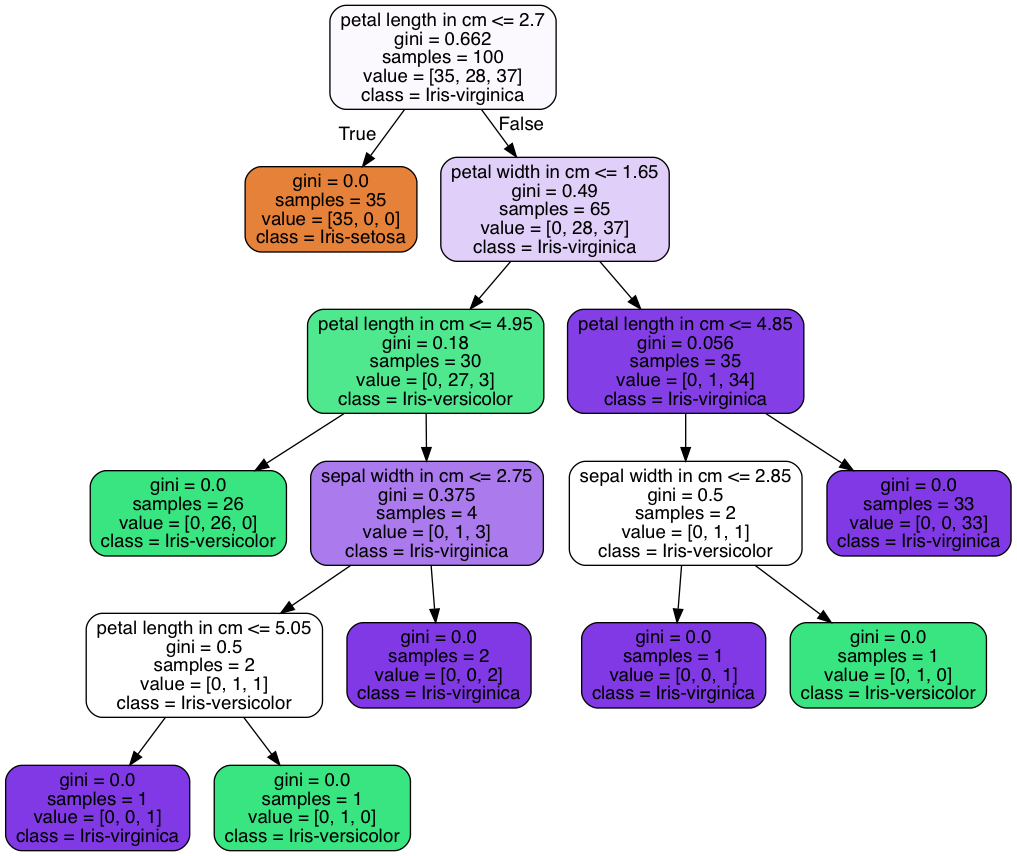

In [254]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())